# CSV/Excel 데이터 분석 Agent

Pandas DataFrame 을 활용하여 분석을 수행하는 Agent 를 생성할 수 있습니다.

CSV/Excel 데이터로부터 Pandas DataFrame 객체를 생성할 수 있으며, 

이를 활용하여 Agent 가 Pandas query 를 생성하여 분석을 수행할 수 있습니다.

In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [2]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH15-Agent-CSV-Excel")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH15-Agent-CSV-Excel


In [3]:
import pandas as pd

df = pd.read_csv("./data/titanic.csv")  # CSV 파일을 읽습니다.
# df2 = pd.read_excel("./data/titanic.xlsx", sheet_name="Sheet1") # 엑셀 파일도 읽을 수 있습니다.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# df = [df1, df] # 여러 개의 데이터프레임을 합칠 수 있습니다.

In [6]:
from langchain_experimental.tools import PythonAstREPLTool

# 파이썬 코드를 실행하는 도구를 생성합니다.
python_tool = PythonAstREPLTool()
python_tool.locals["df"] = df  # 사용할려면 반드시 넣어줘야 함.


# 도구 호출 시 실행되는 콜백 함수입니다.
def tool_callback(tool) -> None:
    print(f"<<<<<<< Code >>>>>>")
    if tool_name := tool.get("tool"):  # 도구에 입력된 값이 있다면
        if tool_name == "python_repl_ast":
            tool_input = tool.get("tool_input")
            for k, v in tool_input.items():
                if k == "query":
                    print(v)  # Query 를 출력합니다.
                    result = python_tool.invoke({"query": v})
                    print(result)
    print(f"<<<<<<< Code >>>>>>")


# 관찰 결과를 출력하는 콜백 함수입니다.
def observation_callback(observation) -> None:
    print(f"<<<<<<< Message >>>>>>")
    if "observation" in observation:
        print(observation["observation"])
    print(f"<<<<<<< Message >>>>>>")


# 최종 결과를 출력하는 콜백 함수입니다.
def result_callback(result: str) -> None:
    print(f"<<<<<<< 최종 답변 >>>>>>")
    print(result)
    print(f"<<<<<<< 최종 답변 >>>>>>")

In [7]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser, AgentCallbacks

agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o", temperature=0),
    df,
    verbose=False,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    # prefix -> 사전에 가지고 있는 프롬프트에 추가적인 요구사항을 더함. (세부적인 지시사항)
    prefix="You are a professional data analyst and expert in Pandas. "
    "You must use Pandas DataFrame(`df`) to answer user's request. "
    "\n\n[IMPORTANT] DO NOT create or overwrite the `df` variable in your code. \n\n"
    "If you are willing to generate visualization code, please use `plt.show()` at the end of your code. "
    "I prefer seaborn code for visualization, but you can use matplotlib as well."
    "\n\n<Visualization Preference>\n"
    "- `muted` cmap, white background, and no grid for your visualization."
    "\nRecomment to set palette parameter for seaborn plot.",
)

parser_callback = AgentCallbacks(tool_callback, observation_callback, result_callback)
stream_parser = AgentStreamParser(parser_callback)

In [8]:
def ask(query):
    # 질의에 대한 답변을 출력합니다.
    response = agent.stream({"input": query})

    for step in response:
        stream_parser.process_agent_steps(step)

<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
df_corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, cmap='muted', annot=True, fmt='.2f', cbar_kws={'shrink': .8}, square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
<<<<<<< Message >>>>>>
<<<<<<< Code >>>>>>
# Calculate the correlation matrix for numeric columns only
df_corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, cmap='muted', annot=True, fmt='.2f', cbar_kws={'shrink': .8}, square=True)

# Set

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<<<<<<< Code >>>>>>
# Calculate the correlation matrix for numeric columns only
df_corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'shrink': .8}, square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


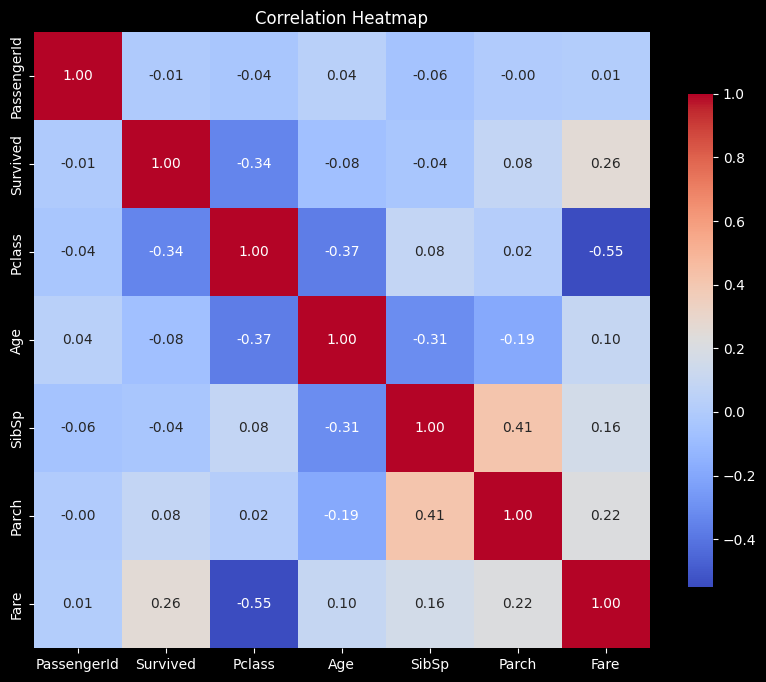

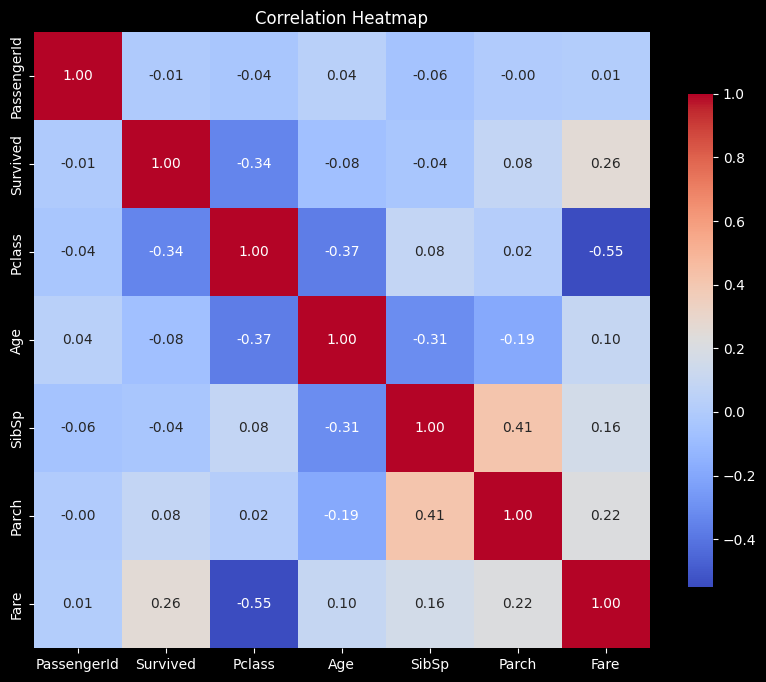


<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
The correlation heatmap has been successfully generated using the 'coolwarm' colormap. This visualization provides insights into the relationships between the numeric features in the dataset.
<<<<<<< 최종 답변 >>>>>>


In [9]:
# 질의에 대한 답변을 출력합니다.
response = agent.stream({"input": "corr() 을 구해서 히트맵 시각화"})

for step in response:
    stream_parser.process_agent_steps(step)

In [10]:
ask("몇 개의 행이 있어?")

<<<<<<< Code >>>>>>
len(df)
891
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
891
<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
데이터프레임에는 총 891개의 행이 있습니다.
<<<<<<< 최종 답변 >>>>>>


In [11]:
ask("남자와 여자의 생존율의 차이는 몇이야?")

<<<<<<< Code >>>>>>
# Calculate the survival rate difference between males and females
male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()
female_survival_rate = df[df['Sex'] == 'female']['Survived'].mean()
survival_rate_difference = female_survival_rate - male_survival_rate
survival_rate_difference
0.5531300709799203
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
0.5531300709799203
<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
남자와 여자의 생존율 차이는 약 0.553입니다. 이는 여자의 생존율이 남자보다 약 55.3% 더 높다는 것을 의미합니다.
<<<<<<< 최종 답변 >>>>>>


<<<<<<< Code >>>>>>
# Calculate survival rate by gender
gender_survival_rate = df.groupby('Sex')['Survived'].mean().reset_index()
gender_survival_rate
      Sex  Survived
0  female  0.742038
1    male  0.188908
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
      Sex  Survived
0  female  0.742038
1    male  0.188908
<<<<<<< Message >>>>>>


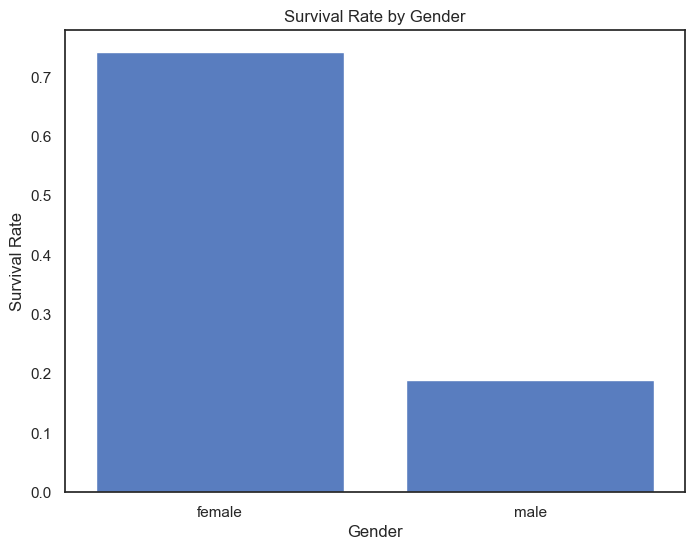

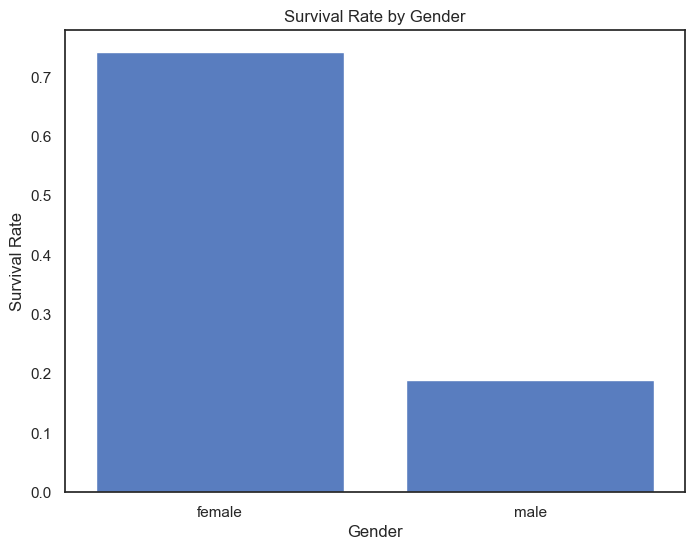

<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and palette
sns.set(style="white", palette="muted")

# Create a barplot for survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=gender_survival_rate)

# Set plot labels and title
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
남자 승객과 여자 승객의 생존율을 바플롯으로 시각화했습니다. 여자는 약 74.2%의 생존율을 보였고, 남자는 약 18.9%의 생존율을 보였습니다.
<<<<<<< 최종 답변 >>>>>>


In [12]:
ask("남자 승객과 여자 승객의 생존율을 구한뒤 barplot 차트로 시각화 해줘")

<<<<<<< Code >>>>>>
# Filter the DataFrame for passengers in Pclass 1 or 2 and Age 10 or below
filtered_df = df[(df['Pclass'].isin([1, 2])) & (df['Age'] <= 10)]

# Calculate survival rate by gender
survival_rate_by_gender = filtered_df.groupby('Sex')['Survived'].mean()
survival_rate_by_gender
Sex
female    0.888889
male      1.000000
Name: Survived, dtype: float64
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
Sex
female    0.888889
male      1.000000
Name: Survived, dtype: float64
<<<<<<< Message >>>>>>


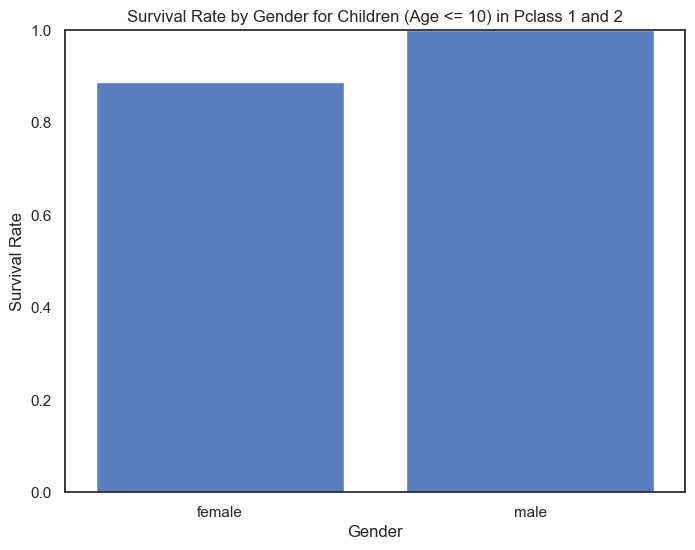

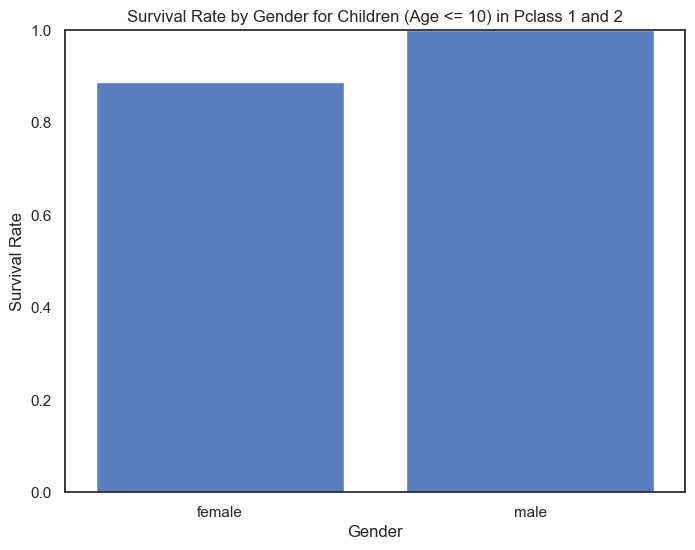

<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and palette
sns.set(style="white", palette="muted")

# Create a bar plot for survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Survival Rate by Gender for Children (Age <= 10) in Pclass 1 and 2')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
10세 이하의 어린 아이들 중 1, 2등급에 탑승한 승객의 성별별 생존율은 다음과 같습니다:

- 여성: 88.89%
- 남성: 100.00%

위의 결과를 바탕으로 시각화한 그래프는 다음과 같습니다.
<<<<<<< 최종 답변 >>>>>>


In [13]:
ask("1,2 등급에 탑승한 10세 이하 어린 아이의 성별별 생존율을 구하고 시각화 하세요")